# Prediction of single images with help of VGG16

This notebook could be used to get a class prediction for a single image.

### 1. Read test dataset and CNN model

In [1]:
import model_data
from src.data.load_data import get_test_dataset

model = model_data.load_vgg16_model()

test_ds = get_test_dataset(image_height=224, image_width=224)
class_names = test_ds.class_names

Found 22688 files belonging to 131 classes.
Using 11344 files for training.


### 2. Image specification and visualize it

* specify the image for that a prediction should be created here

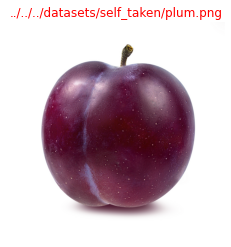

In [2]:
from matplotlib import pyplot

# specify image path here
image_path = '../../../datasets/self_taken/plum.png'

# plot
data = pyplot.imread(image_path)
pyplot.title(image_path, color="red")
pyplot.axis('off')
pyplot.imshow(data)

### 3. Create image class prediction

In [3]:
import tensorflow as tf
from keras_preprocessing.image import load_img, img_to_array

image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

prediction = model.predict(image_array)

predicted_class = class_names[prediction.argmax(axis = 1)[0]]
percent_confidence = 100 * prediction.max()
print("This image most likely belongs to {} with a {:.6f} percent confidence."
        .format(predicted_class, percent_confidence))

This image most likely belongs to Pear Red with a 83.348852 percent confidence.
